<a href="https://colab.research.google.com/github/JeromeHoen/EasyCarbu/blob/master/Notebook_P3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")

In [0]:
url = "https://github.com/JeromeHoen/OC_P3-Developpez_un_moteur_de_recommandations_de_films/raw/master/movie_metadata.csv"
df = pd.read_csv(url)

In [0]:
with pd.option_context('max_columns', 0):
    display(df.sample(5))

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
4317,Color,Phil Claydon,107.0,88.0,6.0,161.0,James Corden,513.0,NaN,Action|Comedy|Fantasy|Horror,MyAnna Buring,Vampire Killers,17296,1593,Silvia Colloca,3.0,blood|breasts|female nudity|lesbian|vampire,http://www.imdb.com/title/tt1020885/?ref_=fn_t...,91.0,English,UK,R,NaN,2009.0,480.0,5.2,2.35,0
3658,Color,Christopher M. Bessette,6.0,88.0,0.0,57.0,John Billingsley,978.0,15059.0,Drama|Thriller,Mira Sorvino,Trade of Innocents,748,1443,Trieu Tran,2.0,angkor wat|human trafficking|sex slavery|sex t...,http://www.imdb.com/title/tt1772408/?ref_=fn_t...,8.0,English,USA,PG-13,NaN,2012.0,323.0,5.4,2.35,543
3078,Color,Jaume Balagueró,108.0,103.0,57.0,132.0,Giancarlo Giannini,541.0,22160085.0,Horror,Lena Olin,Darkness,16747,1228,Francesc Pagès,0.0,9 year old|blood|gramophone|house|missing chil...,http://www.imdb.com/title/tt0273517/?ref_=fn_t...,349.0,English,USA,PG-13,10600000.0,2002.0,451.0,5.4,2.35,1000
4703,Color,Ryan Smith,34.0,90.0,4.0,258.0,Madison Lintz,523.0,NaN,Fantasy|Horror|Mystery|Thriller,Sandra Ellis Lafferty,After,3699,1553,Karolina Wydra,0.0,coma|crash,http://www.imdb.com/title/tt1799508/?ref_=fn_t...,27.0,English,USA,PG-13,650000.0,2012.0,385.0,5.4,2.35,1000
4182,Color,Rob Zombie,220.0,119.0,0.0,593.0,Tyler Mane,908.0,33386128.0,Horror,Scout Taylor-Compton,Halloween II,36372,3226,Margot Kidder,0.0,halloween|hospital|michael myers|rampage|vomiting,http://www.imdb.com/title/tt1311067/?ref_=fn_t...,491.0,English,USA,R,15000000.0,2009.0,764.0,4.9,1.85,3000


In [0]:
with pd.option_context('max_columns', 0):
    display(df.describe([.01, .1, .25, .5, .75, .9, .99]))

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
1%,2.000000,43.000000,0.000000,0.000000,7.000000,8.497800e+03,5.426000e+01,6.420000,0.000000,1.210000,6.000000e+04,1951.340000,0.000000,3.100000,1.330000,0.000000
10%,17.200000,86.000000,0.000000,34.000000,248.500000,3.826018e+05,1.643400e+03,525.200000,0.000000,21.100000,1.400000e+06,1988.000000,79.000000,5.000000,1.850000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
90%,299.800000,134.000000,545.000000,897.000000,18500.000000,1.250252e+08,2.165620e+05,25914.400000,4.000000,630.000000,8.500000e+07,2014.000000,3000.000000,7.800000,2.350000,24000.000000


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [0]:
def series_to_count(series, split_character=",", ascending=False, return_dtype=None, skipna=True):
    """Return a pandas Series with each element counted after a split element-wise"""
    
    if not hasattr(series, "apply") or not hasattr(series, "name"):
        raise TypeError('Not a pandas Series')
    else:
        if split_character:
            tmp_series = series.apply(lambda s: s.split(split_character) if isinstance(s, str) else s)
        else:
            tmp_series = series.apply(lambda s: list(s) if isinstance(s, str) else s)
        count_dict = {}
        for row in tmp_series:
            if isinstance(row, list):
                for elt in row:
                    if elt in count_dict:
                        count_dict[elt] += 1
                    else:
                        count_dict[elt] = 1
            elif not skipna:
                if row in count_dict:
                    count_dict[row] += 1
                else:
                    count_dict[row] = 1
        return pd.Series(count_dict, index=sorted(count_dict, key=count_dict.get, reverse=not ascending), dtype=return_dtype, name=series.name + "_count")

In [0]:
genres = series_to_count(df.genres, "|")
plot_keywords = series_to_count(df.plot_keywords, "|")

In [0]:
genres

Drama          2594
Comedy         1872
Thriller       1411
Action         1153
Romance        1107
Adventure       923
Crime           889
Sci-Fi          616
Fantasy         610
Horror          565
Family          546
Mystery         500
Biography       293
Animation       242
Music           214
War             213
History         207
Sport           182
Musical         132
Documentary     121
Western          97
Film-Noir         6
Short             5
News              3
Reality-TV        2
Game-Show         1
Name: genres_count, dtype: int64

In [0]:
plot_keywords

love                                          198
friend                                        166
murder                                        161
death                                         132
police                                        126
new york city                                  91
high school                                    89
alien                                          82
school                                         73
boy                                            72
fbi                                            71
revenge                                        70
friendship                                     68
drugs                                          66
prison                                         62
money                                          61
marriage                                       60
island                                         57
dog                                            57
female protagonist                             57


In [0]:
(plot_keywords == 1).sum()

4908

In [0]:
shared_plot_keywords = plot_keywords[plot_keywords > 1]

In [0]:
len(shared_plot_keywords)

3178

In [0]:
keywords_to_lists = df['plot_keywords'].fillna("").str.split("|")
df['shared_plot_keywords'] = keywords_to_lists.apply(lambda lst: "|".join([elt for elt in lst if elt in shared_plot_keywords]))

In [0]:
series_to_count(df.plot_keywords, "|", skipna=False).loc[np.NaN]

153

In [0]:
df.plot_keywords.isna().sum()

153

In [0]:
df.director_name.value_counts()

Steven Spielberg         26
Woody Allen              22
Clint Eastwood           20
Martin Scorsese          20
Ridley Scott             17
Steven Soderbergh        16
Tim Burton               16
Spike Lee                16
Renny Harlin             15
Oliver Stone             14
Robert Zemeckis          13
Sam Raimi                13
Robert Rodriguez         13
Barry Levinson           13
John Carpenter           13
Joel Schumacher          13
Michael Bay              13
Ron Howard               13
Kevin Smith              12
Peter Jackson            12
Richard Donner           12
Brian De Palma           12
Tony Scott               12
Shawn Levy               12
Wes Craven               12
Stephen Frears           11
Rob Reiner               11
Francis Ford Coppola     11
Richard Linklater        11
Chris Columbus           11
                         ..
Sarah Smith               1
Sara Sugarman             1
James David Pasternak     1
Orson Welles              1
René Féret          

#### Vérification qu'il n'y a pas des "duos" de directeurs dans la base

In [0]:
series_to_count(df.director_name.str.lower(), "")

e    6295
a    5847
     5335
r    5205
n    4901
o    3902
i    3768
l    3469
s    3088
t    2764
h    2272
d    2171
c    2148
m    2125
g    1311
k    1291
b    1271
u    1196
y    1156
j     996
p     935
w     820
v     741
f     702
z     310
.     239
-      87
x      70
é      48
q      48
'      21
á      20
ó      16
ö      16
å       8
í       8
ñ       7
ç       5
ô       4
ø       3
ï       2
ä       2
û       1
æ       1
è       1
Name: director_name_count, dtype: int64

In [0]:
df.director_name.apply(lambda s: " and " in str(s)).sum()

0

In [0]:
df.director_name.apply(lambda s: " with " in str(s)).sum()

0

In [0]:
df.director_name[df.director_name.str.contains("\.", na=False)]

48                J.J. Abrams
140        M. Night Shyamalan
141               J.J. Abrams
160               J.J. Abrams
168                Jon M. Chu
179     Alejandro G. Iñárritu
197        M. Night Shyamalan
233           James L. Brooks
380                Jon M. Chu
387            Alan J. Pakula
401        Paul W.S. Anderson
430          George A. Romero
461               D.J. Caruso
506        Paul W.S. Anderson
544              F. Gary Gray
549           James L. Brooks
558        Paul W.S. Anderson
562        M. Night Shyamalan
579        M. Night Shyamalan
581        M. Night Shyamalan
595        M. Night Shyamalan
596        Paul W.S. Anderson
675            David S. Goyer
678        Paul W.S. Anderson
679        Paul W.S. Anderson
724              F. Gary Gray
745        M. Night Shyamalan
761          David O. Russell
793        Paul W.S. Anderson
824        Paul W.S. Anderson
                ...          
4445     Timothy Woodward Jr.
4457      Leslie H. Martinson
4459      

In [0]:
df.director_name[df.director_name.str.contains("-", na=False)]

244          Cedric Nicolas-Troyan
414            Jean-Jacques Annaud
555            Florent-Emilio Siri
578            Jean-Jacques Annaud
611            Jean-Jacques Annaud
627            Michael Caton-Jones
753            Michael Caton-Jones
763             Jean-Pierre Jeunet
810                 Pou-Soi Cheang
889             Jean-Pierre Jeunet
958             Jaume Collet-Serra
1013            Jaume Collet-Serra
1019                  Costa-Gavras
1176            Jean-Pierre Jeunet
1190            Sam Taylor-Johnson
1232            Jaume Collet-Serra
1285           Michael Caton-Jones
1298            Jean-Pierre Jeunet
1313              Jean-Marie Poiré
1323             Peter Ho-Sun Chan
1325                  Joon-ho Bong
1344                  Kar-Wai Wong
1451            Jaume Collet-Serra
1488              Jean-Marc Vallée
1505           Jean-Paul Rappeneau
1555            Jean-Pierre Jeunet
1564                Hyung-rae Shim
1684          Jean-François Richet
1703                

#### Analyse des variables catégorielles

In [0]:
df.color.value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

In [0]:
df.language.value_counts()

English       4704
French          73
Spanish         40
Hindi           28
Mandarin        26
German          19
Japanese        18
Italian         11
Cantonese       11
Russian         11
Portuguese       8
Korean           8
Hebrew           5
Arabic           5
Swedish          5
Danish           5
Polish           4
Dutch            4
Norwegian        4
Persian          4
Thai             3
Chinese          3
None             2
Icelandic        2
Zulu             2
Dari             2
Romanian         2
Indonesian       2
Aboriginal       2
Slovenian        1
Swahili          1
Aramaic          1
Filipino         1
Hungarian        1
Panjabi          1
Telugu           1
Maya             1
Tamil            1
Bosnian          1
Czech            1
Mongolian        1
Kazakh           1
Vietnamese       1
Kannada          1
Urdu             1
Dzongkha         1
Greek            1
Name: language, dtype: int64

In [0]:
df.country.value_counts()

USA                     3807
UK                       448
France                   154
Canada                   126
Germany                   97
Australia                 55
India                     34
Spain                     33
China                     30
Japan                     23
Italy                     23
Hong Kong                 17
Mexico                    17
New Zealand               15
South Korea               14
Ireland                   12
Russia                    11
Denmark                   11
Brazil                     8
South Africa               8
Norway                     8
Sweden                     6
Netherlands                5
Thailand                   5
Poland                     5
Israel                     4
Iran                       4
Romania                    4
Argentina                  4
Belgium                    4
                        ... 
Taiwan                     2
Greece                     2
Official site              1
Colombia      

In [0]:
df.content_rating.value_counts()

R            2118
PG-13        1461
PG            701
Not Rated     116
G             112
Unrated        62
Approved       55
TV-14          30
TV-MA          20
TV-PG          13
X              13
TV-G           10
Passed          9
NC-17           7
GP              6
M               5
TV-Y7           1
TV-Y            1
Name: content_rating, dtype: int64

C:\Users\Jerome\Anaconda3\envs\py37\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Jerome\Anaconda3\envs\py37\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


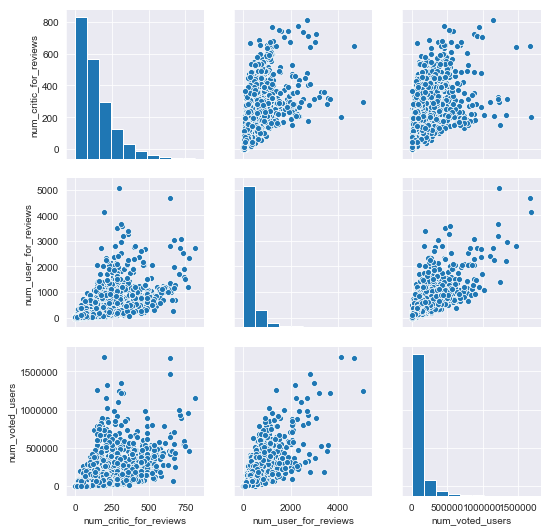

In [0]:
sns.pairplot(
    vars=['num_critic_for_reviews', 'num_user_for_reviews', 'num_voted_users'], 
    data=df
)

In [0]:
with pd.option_context('max_columns', 0):
    display(df.sort_values('imdb_score', ascending=False)[:10])

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2765,Color,John Blanchard,NaN,65.0,0.0,176.0,Andrea Martin,770.0,NaN,Comedy,Martin Short,Towering Inferno,10,1125,Joe Flaherty,2.0,NaN,http://www.imdb.com/title/tt0691996/?ref_=fn_t...,NaN,English,Canada,NaN,NaN,NaN,179.0,9.5,1.33,0
1937,Color,Frank Darabont,199.0,142.0,0.0,461.0,Jeffrey DeMunn,11000.0,28341469.0,Crime|Drama,Morgan Freeman,The Shawshank Redemption,1689764,13495,Bob Gunton,0.0,escape from prison|first person narration|pris...,http://www.imdb.com/title/tt0111161/?ref_=fn_t...,4144.0,English,USA,R,25000000.0,1994.0,745.0,9.3,1.85,108000
3466,Color,Francis Ford Coppola,208.0,175.0,0.0,3000.0,Marlon Brando,14000.0,134821952.0,Crime|Drama,Al Pacino,The Godfather,1155770,28122,Robert Duvall,1.0,crime family|mafia|organized crime|patriarch|r...,http://www.imdb.com/title/tt0068646/?ref_=fn_t...,2238.0,English,USA,R,6000000.0,1972.0,10000.0,9.2,1.85,43000
4409,NaN,John Stockwell,2.0,90.0,134.0,354.0,T.J. Storm,260000.0,NaN,Action,Matthew Ziff,Kickboxer: Vengeance,246,261818,Sam Medina,5.0,NaN,http://www.imdb.com/title/tt3082898/?ref_=fn_t...,1.0,NaN,USA,NaN,17000000.0,2016.0,454.0,9.1,NaN,0
2824,Color,NaN,53.0,55.0,NaN,2.0,Olaf Lubaszenko,20.0,447093.0,Drama,Krystyna Janda,Dekalog,12590,25,Olgierd Lukaszewicz,0.0,meaning of life|moral challenge|morality|searc...,http://www.imdb.com/title/tt0092337/?ref_=fn_t...,37.0,Polish,Poland,TV-MA,NaN,NaN,3.0,9.1,1.33,0
3207,Color,NaN,53.0,55.0,NaN,2.0,Olaf Lubaszenko,20.0,447093.0,Drama,Krystyna Janda,Dekalog,12591,25,Olgierd Lukaszewicz,0.0,meaning of life|moral challenge|morality|searc...,http://www.imdb.com/title/tt0092337/?ref_=fn_t...,37.0,Polish,Poland,TV-MA,NaN,NaN,3.0,9.1,1.33,0
66,Color,Christopher Nolan,645.0,152.0,22000.0,11000.0,Heath Ledger,23000.0,533316061.0,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,57802,Morgan Freeman,0.0,based on comic book|dc comics|psychopath|star ...,http://www.imdb.com/title/tt0468569/?ref_=fn_t...,4667.0,English,USA,PG-13,185000000.0,2008.0,13000.0,9.0,2.35,37000
2837,Color,Francis Ford Coppola,149.0,220.0,0.0,3000.0,Al Pacino,22000.0,57300000.0,Crime|Drama,Robert De Niro,The Godfather: Part II,790926,39960,Robert Duvall,1.0,1950s|corrupt politician|lake tahoe nevada|mel...,http://www.imdb.com/title/tt0071562/?ref_=fn_t...,650.0,English,USA,R,13000000.0,1974.0,14000.0,9.0,1.85,14000
3481,Color,NaN,54.0,53.0,NaN,1000.0,Adam Goldberg,4000.0,NaN,Crime|Drama|Thriller,Kirsten Dunst,Fargo,170055,19949,Oliver Platt,0.0,anthology|death|insurance salesman|minnesota|p...,http://www.imdb.com/title/tt2802850/?ref_=fn_t...,173.0,English,USA,TV-MA,NaN,NaN,1000.0,9.0,1.78,61000
339,Color,Peter Jackson,328.0,192.0,0.0,416.0,Billy Boyd,5000.0,377019252.0,Action|Adventure|Drama|Fantasy,Orlando Bloom,The Lord of the Rings: The Return of the King,1215718,6434,Bernard Hill,2.0,battle|epic|king|orc|ring,http://www.imdb.com/title/tt0167260/?ref_=fn_t...,3189.0,English,USA,PG-13,94000000.0,2003.0,857.0,8.9,2.35,16000


### Des valeurs dupliquées à supprimer

In [0]:
df.duplicated(subset='movie_title', keep=False).sum()

245

In [0]:
df[df.duplicated(subset=['movie_title', 'director_name'], keep=False)].sort_values('movie_title')

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
3711,Color,Richard Fleischer,69.0,127.0,130.0,51.0,Robert J. Wilke,617.0,NaN,Adventure|Drama|Family|Fantasy|Sci-Fi,...,108.0,English,USA,Approved,5000000.0,1954.0,53.0,7.2,1.37,0
4894,Color,Richard Fleischer,69.0,127.0,130.0,51.0,Robert J. Wilke,618.0,NaN,Adventure|Drama|Family|Fantasy|Sci-Fi,...,108.0,English,USA,Approved,5000000.0,1954.0,53.0,7.2,1.37,0
4950,Color,David Hewlett,8.0,88.0,686.0,405.0,David Hewlett,847.0,NaN,Comedy,...,46.0,English,Canada,NaN,120000.0,2007.0,686.0,7.0,1.78,377
4949,Color,David Hewlett,8.0,88.0,686.0,405.0,David Hewlett,847.0,NaN,Comedy,...,46.0,English,Canada,NaN,120000.0,2007.0,686.0,7.0,1.78,377
1420,Color,Wes Craven,256.0,101.0,0.0,574.0,Lin Shaye,40000.0,26505000.0,Horror,...,668.0,English,USA,X,1800000.0,1984.0,852.0,7.5,1.85,10000
4352,Color,Wes Craven,256.0,101.0,0.0,574.0,Lin Shaye,40000.0,26505000.0,Horror,...,668.0,English,USA,X,1800000.0,1984.0,852.0,7.5,1.85,10000
3007,Color,Yimou Zhang,101.0,95.0,611.0,3.0,Ni Yan,9.0,190666.0,Comedy|Drama,...,20.0,Mandarin,China,R,NaN,2009.0,4.0,5.7,2.35,784
4408,Color,Yimou Zhang,101.0,95.0,611.0,3.0,Ni Yan,9.0,190666.0,Comedy|Drama,...,20.0,Mandarin,China,R,NaN,2009.0,4.0,5.7,2.35,784
1113,Color,Julie Taymor,156.0,133.0,278.0,107.0,T.V. Carpio,5000.0,24343673.0,Drama|Fantasy|Musical|Romance,...,524.0,English,USA,PG-13,45000000.0,2007.0,117.0,7.4,2.35,14000
4842,Color,Julie Taymor,156.0,133.0,278.0,107.0,T.V. Carpio,5000.0,24343673.0,Drama|Fantasy|Musical|Romance,...,524.0,English,USA,PG-13,45000000.0,2007.0,117.0,7.4,2.35,14000


In [0]:
df.duplicated(keep=False).sum()

90

In [0]:
with pd.option_context('max_columns', 0):
    display(df[
        (df.duplicated(subset=['movie_title', 'director_name'], keep=False))
         & ~(df.duplicated(keep=False))
    ].sort_values('movie_title'))


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
3711,Color,Richard Fleischer,69.0,127.0,130.0,51.0,Robert J. Wilke,617.0,NaN,Adventure|Drama|Family|Fantasy|Sci-Fi,James Mason,"20,000 Leagues Under the Sea",22123,799,Paul Lukas,0.0,captain|expedition|sea|submarine|whale,http://www.imdb.com/title/tt0046672/?ref_=fn_t...,108.0,English,USA,Approved,5000000.0,1954.0,53.0,7.2,1.37,0
4894,Color,Richard Fleischer,69.0,127.0,130.0,51.0,Robert J. Wilke,618.0,NaN,Adventure|Drama|Family|Fantasy|Sci-Fi,James Mason,"20,000 Leagues Under the Sea",22124,800,Paul Lukas,0.0,captain|expedition|sea|submarine|whale,http://www.imdb.com/title/tt0046672/?ref_=fn_t...,108.0,English,USA,Approved,5000000.0,1954.0,53.0,7.2,1.37,0
4352,Color,Wes Craven,256.0,101.0,0.0,574.0,Lin Shaye,40000.0,26505000.0,Horror,Johnny Depp,A Nightmare on Elm Street,149293,42918,Amanda Wyss,1.0,freddy krueger|lucid dream|serial killer|slash...,http://www.imdb.com/title/tt0087800/?ref_=fn_t...,668.0,English,USA,X,1800000.0,1984.0,852.0,7.5,1.85,10000
1420,Color,Wes Craven,256.0,101.0,0.0,574.0,Lin Shaye,40000.0,26505000.0,Horror,Johnny Depp,A Nightmare on Elm Street,149285,42918,Amanda Wyss,1.0,freddy krueger|lucid dream|serial killer|slash...,http://www.imdb.com/title/tt0087800/?ref_=fn_t...,668.0,English,USA,X,1800000.0,1984.0,852.0,7.5,1.85,10000
4842,Color,Julie Taymor,156.0,133.0,278.0,107.0,T.V. Carpio,5000.0,24343673.0,Drama|Fantasy|Musical|Romance,Jim Sturgess,Across the Universe,91863,5405,Robert Clohessy,0.0,anti war|liverpool|love|protest|song,http://www.imdb.com/title/tt0445922/?ref_=fn_t...,524.0,English,USA,PG-13,45000000.0,2007.0,117.0,7.4,2.35,14000
1113,Color,Julie Taymor,156.0,133.0,278.0,107.0,T.V. Carpio,5000.0,24343673.0,Drama|Fantasy|Musical|Romance,Jim Sturgess,Across the Universe,91860,5405,Robert Clohessy,0.0,anti war|liverpool|love|protest|song,http://www.imdb.com/title/tt0445922/?ref_=fn_t...,524.0,English,USA,PG-13,45000000.0,2007.0,117.0,7.4,2.35,14000
4128,Color,Tim Burton,451.0,108.0,13000.0,11000.0,Alan Rickman,40000.0,334185206.0,Adventure|Family|Fantasy,Johnny Depp,Alice in Wonderland,306336,79957,Anne Hathaway,0.0,alice in wonderland|mistaking reality for drea...,http://www.imdb.com/title/tt1014759/?ref_=fn_t...,736.0,English,USA,PG,200000000.0,2010.0,25000.0,6.5,1.85,24000
33,Color,Tim Burton,451.0,108.0,13000.0,11000.0,Alan Rickman,40000.0,334185206.0,Adventure|Family|Fantasy,Johnny Depp,Alice in Wonderland,306320,79957,Anne Hathaway,0.0,alice in wonderland|mistaking reality for drea...,http://www.imdb.com/title/tt1014759/?ref_=fn_t...,736.0,English,USA,PG,200000000.0,2010.0,25000.0,6.5,1.85,24000
2639,Color,Cameron Crowe,138.0,105.0,488.0,13000.0,Bradley Cooper,15000.0,20991497.0,Comedy|Drama|Romance,Emma Stone,Aloha,39782,44037,Bill Murray,1.0,box office flop|critically bashed|hawaii|one w...,http://www.imdb.com/title/tt1243974/?ref_=fn_t...,172.0,English,USA,PG-13,37000000.0,2015.0,14000.0,5.4,1.85,11000
1389,Color,Cameron Crowe,138.0,105.0,488.0,13000.0,Bradley Cooper,15000.0,20991497.0,Comedy|Drama|Romance,Emma Stone,Aloha,39778,44037,Bill Murray,1.0,box office flop|critically bashed|hawaii|one w...,http://www.imdb.com/title/tt1243974/?ref_=fn_t...,172.0,English,USA,PG-13,37000000.0,2015.0,14000.0,5.4,1.85,11000


Différences sur "num_voted_users"

In [0]:
with pd.option_context('max_columns', 0):
    display(df[
        (df.duplicated(subset=['movie_title', 'director_name', 'num_voted_users'], keep=False))
         & ~(df.duplicated(keep=False))
    ].sort_values('movie_title'))


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1705,Color,Andy Cadiff,65.0,101.0,3.0,120.0,Stark Sands,448.0,12189514.0,Comedy|Romance,Annabella Sciorra,Chasing Liberty,30092,842,Terence Maynard,0.0,first daughter|photographer|prague|president|s...,http://www.imdb.com/title/tt0360139/?ref_=fn_t...,129.0,English,USA,PG-13,23000000.0,2004.0,143.0,6.1,2.35,0
2063,Color,Andy Cadiff,65.0,101.0,3.0,120.0,Stark Sands,448.0,12189514.0,Comedy|Romance,Annabella Sciorra,Chasing Liberty,30092,829,Terence Maynard,0.0,first daughter|photographer|prague|president|s...,http://www.imdb.com/title/tt0360139/?ref_=fn_t...,129.0,English,USA,PG-13,23000000.0,2004.0,143.0,6.1,2.35,0
84,Color,Roland Joffé,10.0,109.0,596.0,283.0,Alice Englert,622.0,NaN,Action|Adventure|Romance|Sci-Fi,Tamsin Egerton,The Lovers,2138,1982,Bipasha Basu,3.0,1770s|british india|great barrier reef|india|ring,http://www.imdb.com/title/tt1321869/?ref_=fn_t...,15.0,English,Belgium,R,NaN,2015.0,525.0,4.5,NaN,677
1508,Color,Roland Joffé,10.0,109.0,596.0,282.0,Alice Englert,621.0,NaN,Action|Adventure|Romance|Sci-Fi,Tamsin Egerton,The Lovers,2138,1980,Bipasha Basu,3.0,1770s|british india|great barrier reef|india|ring,http://www.imdb.com/title/tt1321869/?ref_=fn_t...,15.0,English,Belgium,R,NaN,2015.0,525.0,4.5,NaN,677


Différences sur les likes Facebook

In [0]:
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [0]:
num_cols = [col for col in df.columns if np.issubdtype(df[col].dtype, np.number)]

In [0]:
num_cols

['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'gross',
 'num_voted_users',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'num_user_for_reviews',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

In [0]:
df.groupby(by=['movie_title', 'director_name'])[num_cols].max()[Dekalog]

,,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,director_name,,,,,,,,,,,,,,,,
#Horror,Tara Subkoff,35.0,101.0,37.0,56.0,501.0,NaN,1547,1044,1.0,42.0,1500000.0,2015.0,418.0,3.3,NaN,750
10 Cloverfield Lane,Dan Trachtenberg,411.0,104.0,16.0,82.0,14000.0,71897215.0,126893,14504,0.0,440.0,15000000.0,2016.0,338.0,7.3,2.35,33000
10 Days in a Madhouse,Timothy Hines,1.0,111.0,0.0,247.0,1000.0,14616.0,314,2059,1.0,10.0,12000000.0,2015.0,445.0,7.5,1.85,26000
10 Things I Hate About You,Gil Junger,133.0,97.0,19.0,835.0,23000.0,38176108.0,222099,37907,6.0,549.0,16000000.0,1999.0,13000.0,7.2,1.85,10000
"10,000 B.C.",Christopher Barnard,NaN,22.0,0.0,NaN,5.0,NaN,6,5,0.0,NaN,NaN,NaN,NaN,7.2,NaN,0
102 Dalmatians,Kevin Lima,84.0,100.0,36.0,439.0,2000.0,66941559.0,26413,4182,1.0,77.0,85000000.0,2000.0,795.0,4.8,1.85,372
10th & Wolf,Robert Moresco,26.0,107.0,53.0,463.0,954.0,53481.0,5557,2512,5.0,34.0,8000000.0,2006.0,551.0,6.4,2.35,294
11:14,Greg Marcks,68.0,85.0,9.0,407.0,861.0,NaN,38273,2200,1.0,133.0,6000000.0,2003.0,618.0,7.2,1.85,0
12 Angry Men,Sidney Lumet,177.0,96.0,0.0,253.0,359.0,NaN,447785,1433,1.0,888.0,350000.0,1957.0,259.0,8.9,1.66,40000


In [0]:
def remove_duplicates(df):
    num_cols = [col for col in df.columns if np.issubdtype(df[col].dtype, np.number)]
    
    # must fill nan values to avoid them being drop during the groupby operation
    df['director_name'] = df['director_name'].fillna("nan")
    max_num_values = df.groupby(by=['movie_title', 'director_name'])[num_cols].max()
    
    duplicated_rows = df[
        (df.duplicated(subset=['movie_title', 'director_name'], keep=False))
        & ~(df.duplicated(keep=False))
    ].index

    # fill numeric columns with highest value where movie_title and director_name are the same
    for i in duplicated_rows:
        title = df.at[i, 'movie_title']
        director = df.at[i, 'director_name']
        for col in num_cols:
            df.at[i, col] = max_num_values.loc[(title, director), col]
    
    return df.drop_duplicates(subset=['movie_title', 'director_name'], keep='first')
                                           
df = remove_duplicates(df)

#### Des chaines de charactères posent problème

In [0]:
for movie in df.movie_title:
    if "Dekalog" in movie:
        print('"'+movie+'"')

"Dekalog             "
"Dekalog             "


In [0]:
df_obj = df.select_dtypes(['object'])
df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())
del df_obj

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect_plot = TfidfVectorizer()
X_plot = vect_plot.fit_transform(df.shared_plot_keywords)

In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

km_plot = {}
inertia_plot = []
silhouette_score_plot = []

K = range(1,81)

for k in K:
    km_plot[k] = KMeans(k)
    km_plot[k] = km_plot[k].fit(X_plot)
    inertia_plot.append(km_plot[k].inertia_)
    if k==1:
        silhouette_score_plot.append(0)
    else:
        silhouette_score_plot.append(silhouette_score(X_plot, km_plot[k].labels_))

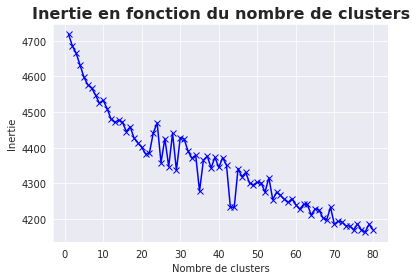

In [0]:
import matplotlib.pyplot as plt
plt.plot(K, inertia_plot, 'bx-')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Inertie en fonction du nombre de clusters', fontdict={'fontweight': 'bold', 'fontsize': 16})
plt.show()

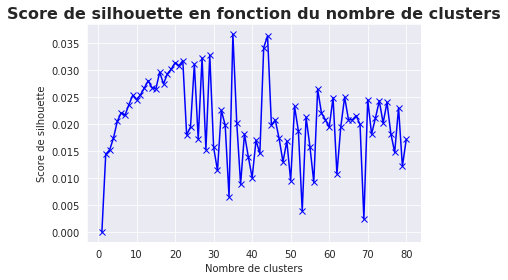

In [0]:
plt.plot(K, silhouette_score_plot, 'bx-')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.title('Score de silhouette en fonction du nombre de clusters', fontdict={'fontweight': 'bold', 'fontsize': 16})
plt.show()

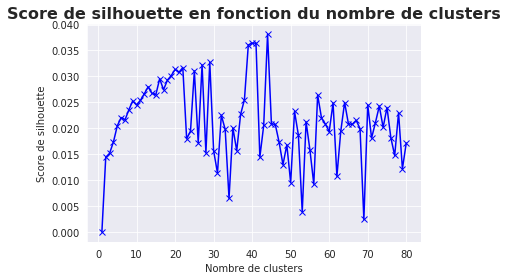

In [0]:
for k in range(35, 46):
  km_plot[k] = KMeans(k, n_init=50)
  km_plot[k] = km_plot[k].fit(X_plot)
  
  silhouette_score_plot[k-1] = silhouette_score(X_plot, km_plot[k].labels_)

plt.plot(K, silhouette_score_plot, 'bx-')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.title('Score de silhouette en fonction du nombre de clusters', fontdict={'fontweight': 'bold', 'fontsize': 16})
plt.show()

On garde k = 39

In [0]:
km_plot[39] = KMeans(39, n_init=200)
km_plot[39] = km_plot[39].fit(X_plot)

In [0]:
np.unique(km_plot[39].labels_, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38], dtype=int32),
 array([ 158,   66, 1975,  128,   56,   65,   24,   68,   55,   49,   74,
         116,  125,   86,  104,  110,  110,  110,   62,   84,  132,   37,
          50,   95,   74,   35,   93,   45,   36,   38,   44,   62,   44,
          73,   84,   69,  116,   56,  111]))

In [0]:
i = np.random.randint(0,40)
df[km_plot[39].labels_==i].sample(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,shared_plot_keywords
3509,Color,nan,11.0,60.0,NaN,652.0,Ashley Scott,10000.0,NaN,Action|Drama|Mystery|Sci-Fi,...,English,USA,TV-14,NaN,NaN,794.0,7.4,1.33,0,female lead|future|mixed martial arts|post apo...
908,Color,Robert Rodriguez,250.0,189.0,0.0,1000.0,Rosario Dawson,16000.0,25031037.0,Action|Horror|Thriller,...,English,USA,R,53000000.0,2007.0,3000.0,7.6,2.35,0,zombie
4254,Black and White,George Miller,177.0,87.0,750.0,41.0,Bruce Spence,745.0,9003011.0,Action|Adventure|Sci-Fi|Thriller,...,English,Australia,R,2000000.0,1981.0,531.0,7.6,2.35,0,australian|post apocalypse|warrior
4820,Color,Chad Kapper,4.0,98.0,0.0,0.0,Natalie Welch,196.0,NaN,Family|Sci-Fi,...,English,USA,NaN,350000.0,2015.0,3.0,3.4,2.35,240,drone|post apocalypse|road trip
4410,Color,Alfred Hitchcock,97.0,95.0,13000.0,82.0,Rhonda Fleming,472.0,NaN,Film-Noir|Mystery|Romance|Thriller,...,English,USA,Unrated,1696377.0,1945.0,239.0,7.6,1.37,0,amnesia|dream sequence|post traumatic stress d...
2048,Color,Ruben Fleischer,445.0,88.0,181.0,11.0,Bill Murray,15000.0,75590286.0,Adventure|Comedy|Horror|Sci-Fi,...,English,USA,R,23600000.0,2009.0,13000.0,7.7,2.35,26000,amusement park|on the road|zombie|zombie apoca...
83,Color,Matt Reeves,521.0,130.0,198.0,884.0,Judy Greer,10000.0,208543795.0,Action|Adventure|Drama|Sci-Fi,...,English,USA,PG-13,170000000.0,2014.0,2000.0,7.6,1.85,45000,ape|dam|leader|post apocalypse|sequel
4340,Color,Scott Dow,23.0,88.0,6.0,233.0,Wray Crawford,680.0,NaN,Comedy|Horror,...,English,USA,R,1250000.0,2015.0,418.0,3.4,NaN,0,zombie|zombie spoof
3741,Color,Edgar Wright,246.0,99.0,1000.0,358.0,Dylan Moran,605.0,13464388.0,Comedy|Horror,...,English,UK,R,4000000.0,2004.0,427.0,8.0,2.35,19000,british horror|zombie|zombie apocalypse
2387,Black and White,George A. Romero,252.0,97.0,0.0,233.0,Shawn Roberts,654.0,20433940.0,Horror,...,English,Canada,R,15000000.0,2005.0,529.0,6.2,2.35,0,apocalypse|mercenary|skyscraper|urban setting|...


#### Visualisation des données

In [0]:
from sklearn.manifold import TSNE
tsne_plot = TSNE(n_components=2, init='pca')
X_trans = tsne_plot.fit_transform(X_plot.toarray())

KeyboardInterrupt: ignored

Trop de dimensions pour un t-SNE.

In [0]:
import umap

umap = umap.UMAP(n_neighbors=6, min_dist=.5)
X_trans_plot = umap.fit_transform(X_genre)

/usr/local/lib/python3.6/dist-packages/umap/spectral.py:229: UserWarning: Embedding a total of 98 separate connected components using meta-embedding (experimental)
  n_components
/usr/local/lib/python3.6/dist-packages/umap/spectral.py:182: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"
/usr/local/lib/python3.6/dist-packages/umap/spectral.py:182: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"


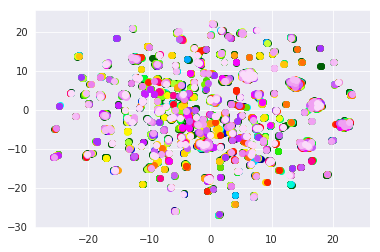

In [0]:
for i in range(39):
    X = X_trans_plot[km_plot[39].labels_==i]
    plt.scatter(X[:,0], X[:,1], color=plt.cm.gist_ncar(i/39))

On lance un K-Means pour identifier les clusters créés en 2D

In [0]:
km_umap = {}
inertia_umap = []
silhouette_score_umap = []

K = range(1,81)

for k in K:
    km_umap[k] = KMeans(k)
    km_umap[k] = km_umap[k].fit(X_trans_plot)
    inertia_umap.append(km_umap[k].inertia_)
    if k==1:
        silhouette_score_umap.append(0)
    else:
        silhouette_score_umap.append(silhouette_score(X_trans_plot, km_umap[k].labels_))

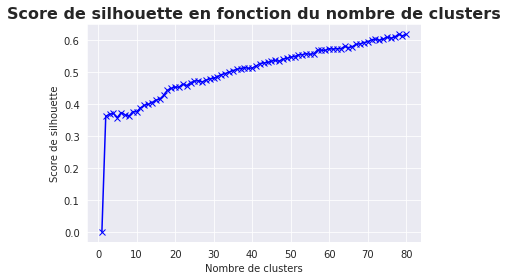

In [0]:
plt.plot(K, silhouette_score_umap, 'bx-')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.title('Score de silhouette en fonction du nombre de clusters', fontdict={'fontweight': 'bold', 'fontsize': 16})
plt.show()

In [0]:
with pd.option_context('max_columns', 0, 'max_colwidth', 500):
  i = np.random.randint(0, 80)
  n_samples = min(10, (km_umap[80].labels_==i).sum())
  display(df[km_umap[39].labels_==i][['movie_title', 'genres', 'shared_plot_keywords']].sample(n_samples))


,movie_title,genres,shared_plot_keywords
363,Tropic Thunder,Action|Comedy,film director|parody|spoof|vietnam|written and directed by cast member
2207,Team America: World Police,Action|Comedy,actor|arab stereotype|terrorist|vomiting
4019,In the Name of the King: The Last Job,Action|Adventure|Fantasy|Thriller,castle|dragon|kidnapping|satire|sword and sorcery
325,The Mummy Returns,Action|Adventure|Fantasy|Thriller,ancient egypt|king|scorpion|son
1772,Kick-Ass,Action|Comedy,comic book|hit in the crotch|narrated by character|reference to batman
3145,Kung Pow: Enter the Fist,Action|Comedy,chosen one|comic violence|kung fu|stylized violence
3407,The Wicked Lady,Adventure|Drama,female nudity|nudity|whipping
4285,"The Book of Mormon Movie, Volume 1: The Journey",Adventure,jerusalem|journey|ship|wilderness
342,Lara Croft: Tomb Raider,Action|Adventure|Fantasy|Thriller,illuminati|time
371,You Don't Mess with the Zohan,Action|Comedy,jew|landlord|muslim|palestinian


In [0]:
word_frequency_url = "https://github.com/JeromeHoen/OC_P3-Developpez_un_moteur_de_recommandations_de_films/raw/master/unigram_freq.csv"
word_freq = pd.read_csv(word_frequency_url)
word_freq.head(10)

,word,count
0,the,23135851162
1,of,13151942776
2,and,12997637966
3,to,12136980858
4,a,9081174698
5,in,8469404971
6,for,5933321709
7,is,4705743816
8,on,3750423199
9,that,3400031103


In [0]:
word_freq[word_freq['word']=='avatar']

,word,count
3552,avatar,21069571


In [0]:
total_word_count = word_freq['count'].sum()

In [0]:
movie_titles_cleaned = df.movie_title.str.lower().str.normalize('NFKD')
movie_titles_cleaned = movie_titles_cleaned.str.replace("[^a-z]+", " ").str.strip()

In [0]:
word_freq['frequency_score'] = np.sqrt(total_word_count / word_freq['count'])

In [0]:
word_freq.head(100)

,word,count,frequency_score
0,the,23135851162,5.041872
1,of,13151942776,6.687127
2,and,12997637966,6.726704
3,to,12136980858,6.961121
4,a,9081174698,8.047547
5,in,8469404971,8.333129
6,for,5933321709,9.956016
7,is,4705743816,11.179449
8,on,3750423199,12.522597
9,that,3400031103,13.152039


In [0]:
word_freq[3000:3010]

,word,count,frequency_score
3000,hills,25770218,151.069046
3001,javascript,25766226,151.080748
3002,fourth,25763406,151.089016
3003,nm,25750788,151.126029
3004,advisor,25719984,151.216501
3005,mn,25715757,151.228929
3006,marketplace,25710584,151.244142
3007,nd,25707693,151.252646
3008,evil,25704669,151.261542
3009,aware,25700328,151.274317


In [0]:
word_freq[word_freq['word']=='kinsey']

,word,count,frequency_score
30623,kinsey,768538,874.786072


In [0]:
word_score = dict(zip(word_freq.word, word_freq.frequency_score))

In [0]:
def total_word_score(string):
  word_scores = [word_score[s] for s in string.split() if s in word_score]
  return sum(word_scores)
   
    


In [0]:
title_score = movie_titles_cleaned.str.split().apply(lambda lst: [word_score[elt] for elt in lst if elt in word_score]).apply(sum)
title_score.name = 'title_score'

In [0]:
pd.concat((df, title_score), axis=1)[['movie_title', 'title_score']].sample(10)

,movie_title,title_score
1457,Untraceable,3045.335252
2664,Match Point,162.699977
1007,Twisted,301.917483
4712,Broken Vessels,412.430932
743,Kangaroo Jack,683.116299
3347,Limbo,833.053471
2917,Jaws,541.310776
2007,Little White Lies,299.649041
316,Land of the Lost,175.946337
3198,Bamboozled,2471.700318


In [0]:
movie_titles_cleaned.loc[4664]

'pandora s box'

In [0]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(100)
svd.fit(X_plot)
svd.explained_variance_.cumsum()

array([0.00714625, 0.01444994, 0.02139766, 0.02814903, 0.03365083,
       0.03912322, 0.04445267, 0.04899066, 0.05333266, 0.05752636,
       0.06170696, 0.06578956, 0.06946447, 0.07285639, 0.076362  ,
       0.0797316 , 0.08306076, 0.08622438, 0.08925162, 0.09215521,
       0.09499872, 0.09780537, 0.10057762, 0.10331797, 0.10604408,
       0.10870949, 0.11135082, 0.11400556, 0.11659433, 0.11912696,
       0.12164646, 0.12412789, 0.12658643, 0.12900748, 0.13141024,
       0.13380467, 0.13617936, 0.13852623, 0.14085376, 0.143181  ,
       0.14549147, 0.14777031, 0.15001616, 0.15224008, 0.15443957,
       0.15662776, 0.15879969, 0.16091766, 0.16300719, 0.16510209,
       0.16716543, 0.16918145, 0.17119205, 0.17317983, 0.17514407,
       0.17707745, 0.17899756, 0.18090211, 0.18280907, 0.18469836,
       0.18656504, 0.18841773, 0.19024685, 0.19206333, 0.19386504,
       0.19565231, 0.19742962, 0.19917617, 0.20092117, 0.20265445,
       0.20438249, 0.20609559, 0.20780019, 0.20948825, 0.21117

In [0]:
from sklearn.decomposition import PCA
pca = PCA(100)
pca.fit(X_plot.toarray())
pca.explained_variance_.cumsum()

array([0.00891106, 0.01642824, 0.02340807, 0.0299401 , 0.03557663,
       0.0409316 , 0.04598376, 0.05045296, 0.05479375, 0.0590013 ,
       0.06318268, 0.06718038, 0.07086846, 0.07439673, 0.07777173,
       0.08110677, 0.08435474, 0.08748097, 0.09050925, 0.09343441,
       0.09625322, 0.09903132, 0.1017839 , 0.10452411, 0.10724215,
       0.10991548, 0.11257438, 0.11518833, 0.1177335 , 0.12025478,
       0.12274122, 0.12522346, 0.12767479, 0.13008829, 0.1324872 ,
       0.13488412, 0.13724865, 0.13960025, 0.14193297, 0.14425377,
       0.1465403 , 0.14881815, 0.15106943, 0.15329262, 0.15549806,
       0.15769805, 0.15987759, 0.1620106 , 0.16411509, 0.16621034,
       0.16828454, 0.17033133, 0.1723434 , 0.17434075, 0.17632086,
       0.17828006, 0.18021548, 0.18213778, 0.18405343, 0.18595434,
       0.18783505, 0.18970321, 0.19156127, 0.19339576, 0.19521984,
       0.1970201 , 0.19880858, 0.20058811, 0.20234331, 0.20409617,
       0.20583886, 0.20757675, 0.20930101, 0.21100949, 0.21270

In [0]:
X_trans = tsne_plot.fit_transform(pca.fit_transform(X_plot.toarray()))

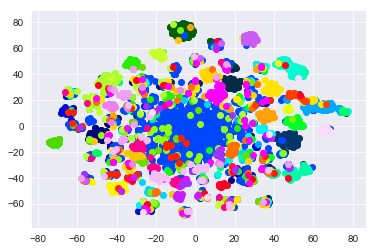

In [0]:
for i in range(39):
    X = X_trans[km_plot[39].labels_==i]
    plt.scatter(X[:,0], X[:,1], color=plt.cm.gist_ncar(i/39))

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect_genre = TfidfVectorizer()
X_genre = vect_genre.fit_transform(df.genres)

In [0]:
from sklearn.cluster import KMeans

km_genre = {}
inertia_genre = []
silhouette_score_genre = []

K = range(1,81)

for k in K:
    km_genre[k] = KMeans(k)
    km_genre[k] = km_genre[k].fit(X_genre)
    inertia_genre.append(km_genre[k].inertia_)
    if k==1:
        silhouette_score_genre.append(0)
    else:
        silhouette_score_genre.append(silhouette_score(X_genre, km_genre[k].labels_))

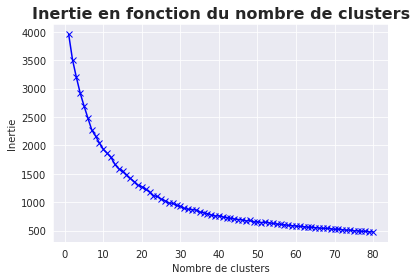

In [0]:
import matplotlib.pyplot as plt
plt.plot(K, inertia_genre, 'bx-')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Inertie en fonction du nombre de clusters', fontdict={'fontweight': 'bold', 'fontsize': 16})
plt.show()

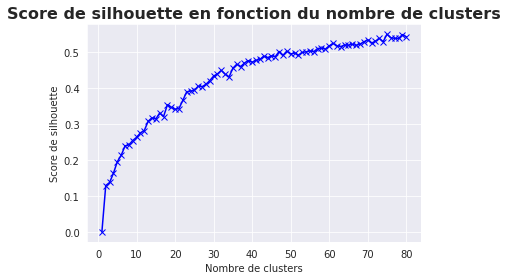

In [0]:
plt.plot(K, silhouette_score_genre, 'bx-')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.title('Score de silhouette en fonction du nombre de clusters', fontdict={'fontweight': 'bold', 'fontsize': 16})
plt.show()

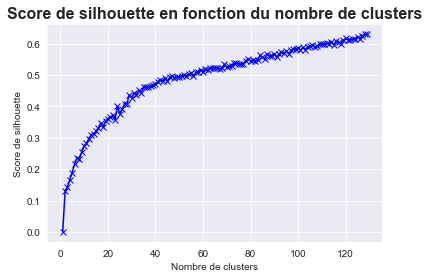

In [0]:
K_bis = range(81, 130)
for k in K_bis:
    km_genre[k] = KMeans(k)
    km_genre[k] = km_genre[k].fit(X_genre)
    inertia_genre.append(km_genre[k].inertia_)
    if k==1:
        silhouette_score_genre.append(0)
    else:
        silhouette_score_genre.append(silhouette_score(X_genre, km_genre[k].labels_))
        
plt.plot(range(1, 130), silhouette_score_genre, 'bx-')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.title('Score de silhouette en fonction du nombre de clusters', fontdict={'fontweight': 'bold', 'fontsize': 16})
plt.show()

Risque d'overfit avec un nombre de clusters trop élevé, sachant qu'on a moins de 5000 films dans la base corrigée.

Regardons avec 129 clusters quels films sont regroupés

In [0]:
df[df.movie_title.str.contains("Star Wars")].movie_title

4           Star Wars: Episode VII - The Force Awakens
236       Star Wars: Episode III - Revenge of the Sith
237       Star Wars: Episode II - Attack of the Clones
240          Star Wars: Episode I - The Phantom Menace
1536        Star Wars: Episode VI - Return of the Jedi
2051    Star Wars: Episode V - The Empire Strikes Back
3024                Star Wars: Episode IV - A New Hope
3329                         Star Wars: The Clone Wars
Name: movie_title, dtype: object

In [0]:
star_wars_idx = df[df.movie_title.str.contains("Star Wars")].index
star_wars_idx

Int64Index([4, 236, 237, 240, 1536, 2051, 3024, 3329], dtype='int64')

In [0]:
km_genre[129] = KMeans(129)
km_genre[129] = km_genre[129].fit(X_genre)
km_genre[129].labels_[star_wars_idx]

array([ 26,  10, 105,  16,  65,  18,  11,  21], dtype=int32)

Les films Star Wars sont dans des clusters différents

In [0]:
km_genre[39].labels_[star_wars_idx]

array([ 9,  4,  4, 18, 32, 19,  1, 11], dtype=int32)

In [0]:
km_plot[39].labels_[star_wars_idx]

array([23, 23,  6, 23, 14, 23, 28,  9], dtype=int32)

In [0]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import pdist

X_genre_sw = X_genre[star_wars_idx]
sw_genre_dist = pairwise_distances(X_genre_sw)

# skip diagonal from the calculation of the mean, as it bias the value downwards for small number of values
np.fill_diagonal(sw_genre_dist, np.NaN)
print("Star Wars mean genre euclidian distance:", np.nanmean(sw_genre_dist))

global_genre_dist = pdist(X_genre.toarray())
print("Global mean genre euclidian distance:", global_genre_dist.mean())

del X_genre_sw
del sw_genre_dist
del global_genre_dist

Star Wars mean genre euclidian distance: 1.3263535211602009
Global mean genre euclidian distance: 1.2448836195636428


In [0]:
X_plot_sw = X_plot[star_wars_idx]
sw_plot_dist = pairwise_distances(X_plot_sw)

# skip diagonal from the calculation of the mean, as it bias the value downwards for small number of values
np.fill_diagonal(sw_plot_dist, np.NaN)
print("Star Wars mean plot euclidian distance:", np.nanmean(sw_plot_dist))

global_plot_dist = pdist(X_plot.toarray())
print("Global mean plot euclidian distance:", global_plot_dist.mean())

Star Wars mean plot euclidian distance: 1.1861858369855867
Global mean plot euclidian distance: 1.3802199282133716


In [0]:
print(global_genre_dist.shape, 5000**2)

(12095821,) 25000000
